In [1]:
library(igraph)
library(rjson)
library(data.table)
library("ggplot2")
library(grid)



Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
#Question6
json_sfc<-fromJSON(file='data/san_francisco_censustracts.json')
attributes(json_sfc)
csv_sfc<-read.csv(file='data/san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv',header=TRUE,sep=",")
setDT(csv_sfc)
csv_sfc<-csv_sfc[month==12][, c("sourceid", "dstid", "mean_travel_time")]

$names
[1] "type"     "features"

In [3]:
temps<-json_sfc $ features
l<-length(temps)
print(l)
display_temp<-c()
x_temp<-c()
y_temp<-c()
movement_id_temp<-c()
location_temp<-list()
for(i in 1:l){
    temp=temps[[i]]
    display_temp<-c(display_temp,temp$properties$DISPLAY_NAME)
    location<-temp$geometry$coordinates
    location2<-split(unlist(location),1:2)
    x_ave=mean(location2[[1]])
    y_ave=mean(location2[[2]])
    x_temp<-c(x_temp,x_ave)
    y_temp<-c(y_temp,y_ave)
    location3<-c()
    location3<-c(location3,x_ave)
    location3<-c(location3,y_ave)
    location_temp[[i]]<-location3
    movement_id_temp<-c(movement_id_temp,temp$properties$MOVEMENT_ID)
}
g<-graph.data.frame(d=csv_sfc,directed=FALSE)
print(g)
print(vcount(g))
print(ecount(g))
display<-as.list(setNames(display_temp,movement_id_temp))
xtemp<-as.list(setNames(x_temp,movement_id_temp))
ytemp<-as.list(setNames(y_temp,movement_id_temp))
location4<-as.list(setNames(location_temp,movement_id_temp))
V(g)$DISPLAY_NAME<-display[V(g)$name]
V(g)$x1<-xtemp[V(g)$name]
V(g)$y1<-ytemp[V(g)$name]
V(g)$LOCATION<-location4[V(g)$name]
g<-simplify(g, remove.multiple=TRUE,edge.attr.comb="mean")
temp1<-components(g)
gcc<-induced.subgraph(g, which(temp1$membership==which.max(temp1$csize)))
print(gcc)
print(vcount(gcc))
print(ecount(gcc))

[1] 2710
IGRAPH 5f163ee UN-- 1887 538998 -- 
+ attr: name (v/c), mean_travel_time (e/n)
+ edges from 5f163ee (vertex names):
 [1] 1938--1952 1747--629  1872--1919 1871--1929 81  --2319 1873--1909
 [7] 232 --809  1891--1729 2423--62   650 --1829 680 --1529 542 --2251
[13] 604 --1631 660 --1729 1329--1917 2421--82   1736--739  2021--1192
[19] 550 --2171 1721--1308 1700--1518 176 --2145 1721--889  536 --2311
[25] 74  --2466 288 --326  169 --2215 99  --2216 1755--549  646 --1211
[31] 2315--528  2322--458  2307--608  1390--111  641 --1261 1872--1946
[37] 2357--108  1454--64   1729--809  2355--128  722 --1207 2307--612 
[43] 98  --2226 1074--464  1058--624  614 --1531 151 --2395 2341--268 
+ ... omitted several edges
[1] 1887
[1] 538998
IGRAPH 6088818 UN-- 1880 311802 -- 
+ attr: name (v/c), DISPLAY_NAME (v/x), x1 (v/x), y1 (v/x), LOCATION
| (v/x), mean_travel_time (e/n)
+ edges from 6088818 (vertex names):
 [1] 1938--1747 1938--1872 1938--1873 1938--232  1938--1891 1938--550 
 [7] 1938--172

In [11]:
a<-0
b<-0
for(i in 1: vcount(g)){
    for(j in i:vcount(g)){
        c<-sqrt((V(g)[i]$x-V(g)[j]$x)^2+(V(g)[i]$y-V(g)[j]$y)^2)
        id<-get.edge.ids(g,c(i,j),directed=F,error=F)
        print(id)
        if(id!=0){
            a<-a+c
            b<-b+E(g)[id]$mean_travel_time
            print("show")
            print(a)
            print(b)
        }
    }
}
mean_travel_time_ratio<-b/a
print(mean_travel_time_ratio)

ERROR: Error in V(g)[i]$x - V(g)[j]$x: non-numeric argument to binary operator


IGRAPH 6188bc5 UN-- 1880 1879 -- 
+ attr: name (v/c), DISPLAY_NAME (v/x), x1 (v/x), y1 (v/x), LOCATION
| (v/x), mean_travel_time (e/n)
+ edges from 6188bc5 (vertex names):
 [1] 1938--1241 1938--700  1938--2631 1747--1455 1747--528  1747--1746
 [7] 1872--563  1871--563  1871--1381 1871--390  81  --1701 81  --1295
[13] 81  --1772 1873--2488 232 --2155 232 --2513 1891--1868 2423--169 
[19] 2423--387  2423--602  2423--1086 650 --1703 650 --206  680 --1748
[25] 680 --1461 542 --2700 542 --2503 542 --543  604 --1595 604 --1102
[31] 660 --1296 660 --1776 660 --967  1329--1311 1329--824  2421--2225
[37] 2421--2214 1736--2251 1736--1737 2021--1180 2021--2066 550 --702 
+ ... omitted several edges

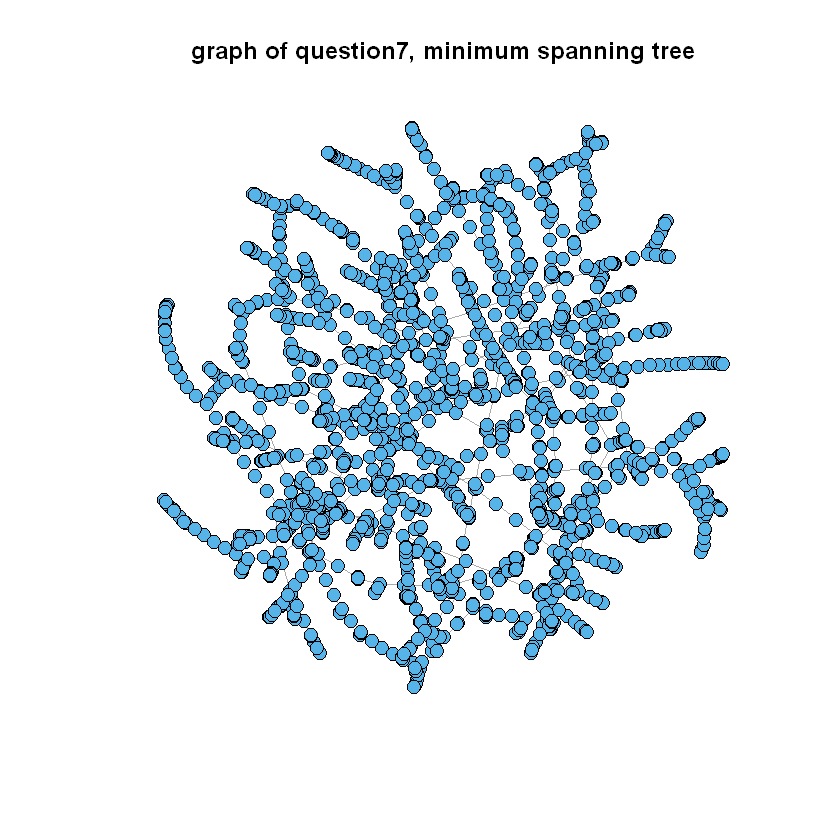

In [4]:
#question7
mstree<-mst(gcc,weights=E(gcc)$mean_travel_time)
mstree
plot(mstree, vertex.color = rep(2, vcount(gcc)), vertex.size = rep(5, vcount(gcc)), vertex.label = NA, main="graph of question7, minimum spanning tree")

In [5]:
street_address<-list()
for(i in 1:5){
    edge<-E(mstree)[i]
    print(edge)
    temp<-ends(mstree,edge)
    street_address[[i]]<-c(V(mstree)[temp[1]]$DISPLAY_NAME,V(mstree)[temp[2]]$DISPLAY_NAME,edge$mean_travel_time)
}
print(street_address)

+ 1/1879 edge from 6188bc5 (vertex names):
[1] 1938--1241
+ 1/1879 edge from 6188bc5 (vertex names):
[1] 1938--700
+ 1/1879 edge from 6188bc5 (vertex names):
[1] 1938--2631
+ 1/1879 edge from 6188bc5 (vertex names):
[1] 1747--1455
+ 1/1879 edge from 6188bc5 (vertex names):
[1] 1747--528
[[1]]
[[1]][[1]]
[1] "3300 Brodie Drive, South San Jose, San Jose"

[[1]][[2]]
[1] "4300 La Torre Avenue, South San Jose, San Jose"

[[1]][[3]]
[1] 132.59


[[2]]
[[2]][[1]]
[1] "3300 Brodie Drive, South San Jose, San Jose"

[[2]][[2]]
[1] "3700 McLaughlin Avenue, South San Jose, San Jose"

[[2]][[3]]
[1] 126.24


[[3]]
[[3]][[1]]
[1] "3300 Brodie Drive, South San Jose, San Jose"

[[3]][[2]]
[1] "400 Ginkgo Court, South San Jose, San Jose"

[[3]][[3]]
[1] 109.625


[[4]]
[[4]][[1]]
[1] "1700 Coyote Point Drive, Shoreview, San Mateo"

[[4]][[2]]
[1] "1800 Helene Court, East San Mateo, San Mateo"

[[4]][[3]]
[1] 80.985


[[5]]
[[5]][[1]]
[1] "1700 Coyote Point Drive, Shoreview, San Mateo"

[[5]][[2]]
[1] 

In [21]:
#question8
satisfy_tri<-0
notsatisfy_tri<-0
matrix<-as_adjacency_matrix(gcc,type="both",attr="mean_travel_time")
for(i in 1:1000){
    vertex<-sample(1:vcount(gcc),3,replace=FALSE)
    v1<-matrix[vertex[1],vertex[2]]
    v2<-matrix[vertex[2],vertex[3]]
    v3<-matrix[vertex[3],vertex[1]]
    if((v1+v2>v3)&&(v1+v3>v3)&&(v2+v3>v1)){
        notsatisfy_tri=notsatisfy_tri+1
    }else{
        satisfy_tri=satisfy_tri+1
    }
}
print(satisfy_tri)
print(notsatisfy_tri)
print(satisfy_tri/1000)

[1] 959
[1] 41
[1] 0.959


In [10]:
#question9
temptree<-make_empty_graph(n=vcount(mstree),directed=FALSE)
tempdfs<-dfs(mstree,root=1,neimode="all")
temporder<-as.matrix(tempdfs$order)
meanratio<-6000
cost<-0.0
tem<-c()
for(i in 1:(vcount(mstree)-1)){
    temptree<-add_edges(temptree,c(temporder[i],temporder[i+1]))
    tem2<-E(mstree)[get.edge.ids(mstree,c(temporder[i],temporder[i+1]))]$mean_travel_time
    if(length(tem2)>0){
        cost<-cost+tem2
        tem<-c(tem,tem2)
    }else{
        tem2<-meanratio*sqrt((V(mstree)[temporder[i]]-V(mstree)[temporder[i+1]])^2+(V(mstree)[temporder[i]]-V(mstree)[temporder[i+1]])^2)
        cost<-cost+tem2
        tem<-c(tem,tem2)
    }
}
#cost<-cost+meanratio*sqrt((V(mstree)[temporder[1]]-V(mstree)[temporder[1887]])^2+(V(mstree)[temporder[1]]-V(mstree)[temporder[1887]])^2)
print(cost)

+ 1/1880 vertex, named, from 6188bc5:
[1] 1873


[1] 279408.2
[1] 558816.4
[1] 1880
[1] 257.83


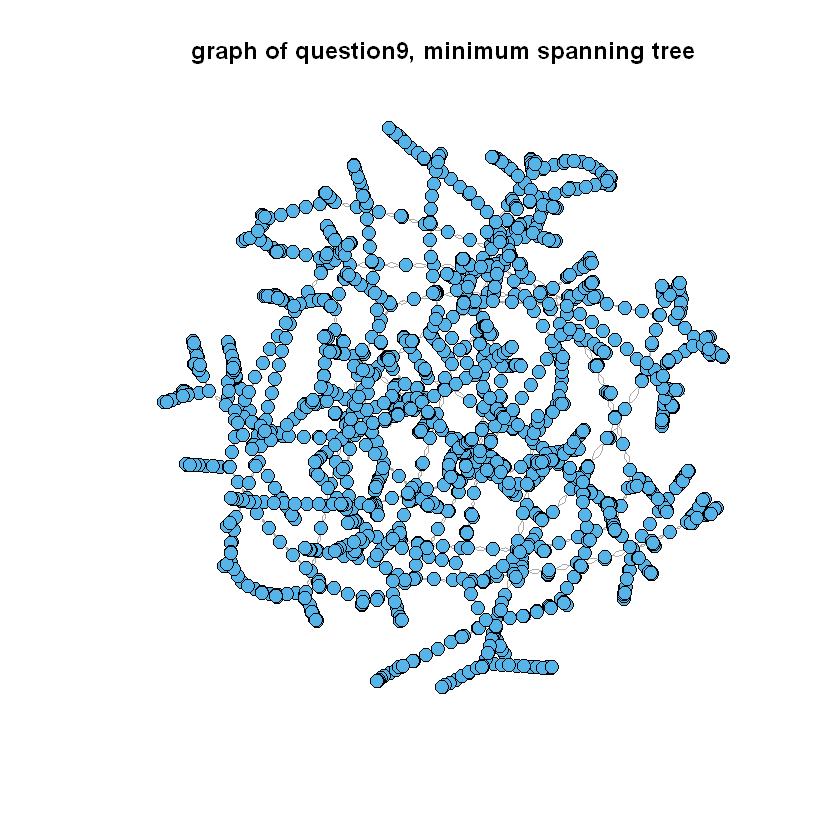

In [11]:
mstree2=as.undirected(as.directed(mstree,'mutual'),'each')
plot(mstree2, vertex.color = rep(2, vcount(gcc)), vertex.size = rep(5, vcount(gcc)), vertex.label = NA, main="graph of question9, minimum spanning tree")
small<-sum(E(mstree)$mean_travel_time)
print(small)
big<-sum(E(mstree2)$mean_travel_time)
print(big)
temptree<-make_empty_graph(n=vcount(mstree),directed=FALSE)
tempdfs<-dfs(mstree,root=1,neimode="all")
temporder<-as.matrix(tempdfs$order)
print(length(temporder))
a= as_adjacency_matrix(gcc, type = "both", attr = "mean_travel_time")
print(a[temporder[1],temporder[1880]])


In [12]:
num<-0
for(i in 1:(length(temporder)-1)){
    t<-a[temporder[i],temporder[i+1]]
    if(t==0){
        t<-distances(gcc,temporder[i],temporder[i+1],weights=E(gcc)$mean_travel_time)
    }
    num<-num+t
}

In [18]:
print(num)
print(num/small)

          252
1980 464500.5
          252
1980 1.662444


   [1] -121.8217 -121.8145 -121.8169 -121.8143 -121.8049 -121.7680 -121.7895
   [8] -121.7627 -121.7718 -121.7647 -121.7334 -121.4812 -121.6210 -121.6602
  [15] -121.6437 -121.6305 -121.5686 -121.6059 -121.5163 -121.5713 -121.5655
  [22] -121.5713 -121.5901 -121.7128 -121.3398 -121.4911 -121.6935 -121.6752
  [29] -121.7074 -121.7447 -121.7561 -121.7496 -121.7686 -121.7704 -121.7821
  [36] -121.7696 -121.7699 -121.7545 -121.7421 -121.7548 -121.7512 -121.7843
  [43] -121.6849 -121.7924 -121.8059 -121.8108 -121.8764 -121.8784 -121.8762
  [50] -121.8608 -121.9230 -121.9306 -121.9187 -121.9630 -121.8992 -122.0747
  [57] -122.1381 -122.0122 -121.9786 -121.9966 -121.9910 -122.0313 -122.0598
  [64] -122.0368 -122.0964 -122.0872 -122.0079 -122.0426 -122.0409 -122.0646
  [71] -122.0580 -122.0618 -122.0347 -122.0270 -122.0298 -122.1605 -121.9896
  [78] -121.9771 -121.9666 -121.9703 -121.9953 -121.9897 -122.0040 -122.0160
  [85] -121.9456 -121.7740 -121.8000 -121.7912 -121.7959 -121.7851 -121.7546

   [1] 37.29051 37.28098 37.27305 37.26706 37.26290 37.25525 37.25095 37.23474
   [9] 37.22992 37.22306 37.17671 37.20584 37.15503 37.15048 37.13480 37.11151
  [17] 37.10343 37.06385 37.00969 37.01559 37.00267 36.98653 36.98129 37.05510
  [25] 36.88836 36.83294 36.84443 36.81660 36.80941 36.74498 36.76601 36.83709
  [33] 36.87522 36.90620 36.93177 36.93110 36.92217 36.91143 36.92176 36.92734
  [41] 36.94958 36.95745 36.93675 36.93810 37.01087 36.90304 36.96297 36.95699
  [49] 36.98003 37.02657 36.97775 36.98658 37.02630 37.04087 37.08446 37.16114
  [57] 37.13339 37.07827 36.99728 36.99809 37.02837 37.02066 37.02809 37.09806
  [65] 37.09735 37.07863 36.98417 36.98787 36.96995 36.97417 36.98944 36.95625
  [73] 36.95901 36.96685 36.97594 37.08745 36.98289 36.97716 36.97482 36.96438
  [81] 36.97363 36.96555 36.97173 36.97418 36.98023 36.70357 36.71120 36.68107
  [89] 36.67744 36.67078 36.61705 36.61425 36.60125 36.60462 36.61255 36.61122
  [97] 36.61853 36.59466 36.57732 36.59124 36.60073 

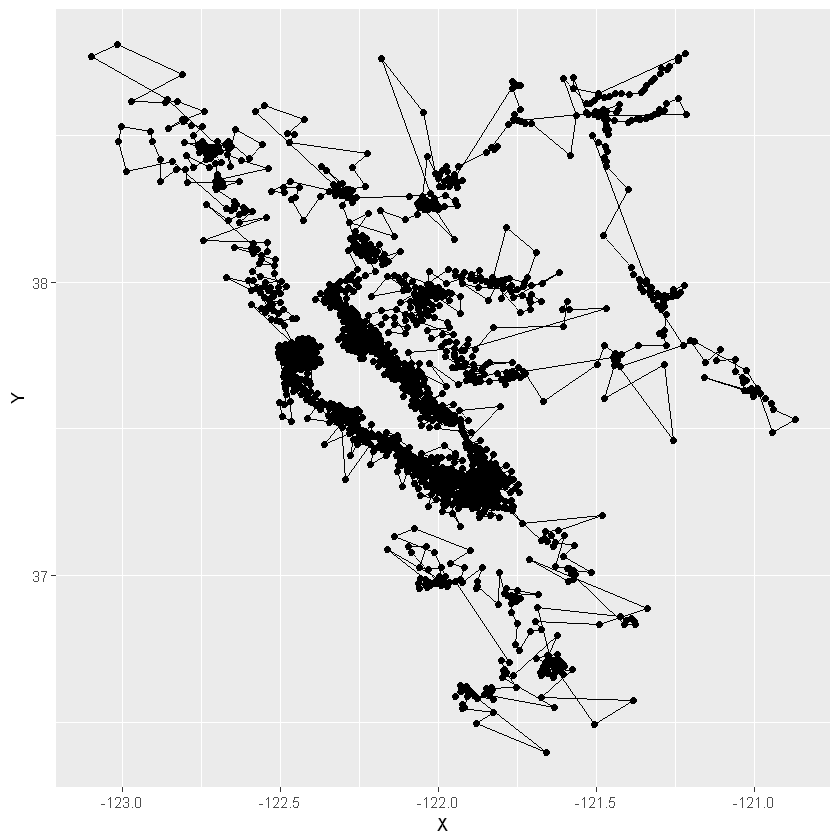

In [32]:
x<-c()
y<-c()
for( i in 1:length(temporder)){
    x<-c(x,as.numeric(V(gcc)[temporder[i]]$x1))
    y<-c(y,as.numeric(V(gcc)[temporder[i]]$y1))
}
print(x)
print(y)
data1<-data.frame(X=x,Y=y)
qplot(X,Y,data=data1)+geom_point(alpha=1,shape='*',size=3)+geom_path(linetype=1,size=0.1)